**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
# %%pycodestyle
from collections import Counter
from scipy import stats
import time
from sklearn import metrics
from sklearn.neighbors import KDTree


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.algorithm == 'kd_tree':
            self.kdt = KDTree(self.X, leaf_size=50, metric='minkowski', p=2)
        return self

    def predict(self, X):
        x = self._sample_predict(X)
        return stats.mode(x, axis=1)[0].squeeze(axis=1)

    def _sample_predict(self, X):
        if self.algorithm == 'brute':
            d = metrics.pairwise_distances(X, self.X)
            xx = self.y[np.argpartition(d, self.n_neighbors)
                        [:, :self.n_neighbors]]
            return xx
        if self.algorithm == 'kd_tree':
            return self.y[self.kdt.query(X,
                                         k=self.n_neighbors,
                                         return_distance=False)]

    def predict_proba(self, X):
        xx = self._sample_predict(X)
        self.all_classes = sorted(set(self.y))
        return np.array(list(map(self._sample_proba, xx)))

    def _sample_proba(self, neighbours):
        cnt = Counter(neighbours)
        return np.array([cnt.get(i, 0) / self.n_neighbors
                         for i in self.all_classes])

    def score(self, X, y):
        return 1 - np.count_nonzero(self.predict(X) - y) / len(y)

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.1,
                                                    stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
%time clf.fit(X_train, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [8]:
%time clf.predict(X_test)

Wall time: 7 ms


array([2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0])

In [9]:
%time my_clf.predict(X_test)

Wall time: 2 ms


array([2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0])

In [10]:
%time clf.predict_proba(X_test)

Wall time: 1 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

Wall time: 2 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

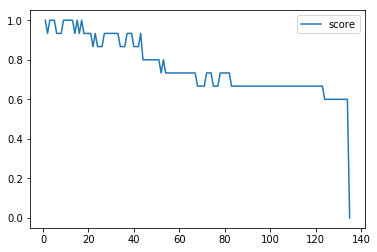

In [14]:
# %%pycodestyle
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.1,
                                                    stratify=iris.target)
N = len(y_train)
a_score = [0]*N
for i in range(1, N):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute')
    my_clf.fit(X_train, y_train)
    my_clf.predict(X_test)
    a_score[i-1] = my_clf.score(X_test, y_test)

plt.plot(range(1, N+1), a_score[:], label='score')
plt.legend()

**MNIST**

In [15]:
# mnist = fetch_mldata('MNIST original')
from mlxtend.data import loadlocal_mnist


X, y = loadlocal_mnist(
    images_path='C:\\Users\\pas-valkov\\texno\\algo\\train-images.idx3-ubyte',
    labels_path='C:\\Users\\pas-valkov\\texno\\algo\\train-labels.idx1-ubyte')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.01, stratify=y)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [18]:
%time clf.fit(X_train, y_train)

Wall time: 5 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [20]:
%time clf.predict(X_test)

Wall time: 2.9 s


array([2, 3, 3, 2, 8, 7, 1, 7, 3, 9, 1, 6, 6, 0, 9, 3, 4, 2, 1, 7, 8, 3,
       5, 9, 6, 5, 5, 2, 4, 1, 1, 7, 5, 6, 3, 6, 7, 3, 2, 5, 1, 2, 1, 4,
       0, 1, 5, 9, 7, 4, 8, 4, 5, 8, 1, 5, 4, 4, 2, 0, 5, 7, 5, 7, 1, 9,
       8, 6, 1, 0, 2, 9, 2, 7, 8, 6, 5, 4, 7, 4, 4, 4, 4, 7, 4, 1, 6, 6,
       5, 7, 0, 8, 6, 4, 2, 5, 1, 0, 8, 1, 4, 7, 9, 6, 3, 2, 3, 9, 0, 8,
       7, 7, 6, 2, 2, 1, 7, 0, 8, 8, 3, 5, 5, 8, 1, 3, 6, 5, 1, 8, 6, 3,
       9, 4, 7, 1, 0, 7, 2, 6, 3, 3, 7, 8, 3, 4, 2, 2, 0, 0, 3, 1, 9, 0,
       3, 6, 9, 9, 8, 9, 1, 8, 4, 8, 6, 2, 6, 0, 4, 6, 4, 2, 5, 3, 3, 0,
       8, 7, 0, 9, 4, 6, 6, 6, 2, 5, 2, 7, 9, 9, 1, 9, 6, 9, 6, 1, 2, 4,
       5, 8, 3, 9, 3, 1, 6, 0, 3, 9, 8, 5, 7, 2, 6, 6, 2, 8, 4, 3, 7, 1,
       1, 9, 1, 0, 1, 0, 2, 2, 6, 7, 8, 5, 6, 4, 4, 6, 4, 7, 0, 2, 1, 1,
       6, 9, 0, 5, 0, 1, 6, 9, 8, 4, 6, 6, 0, 2, 0, 7, 8, 2, 3, 0, 7, 1,
       0, 4, 5, 3, 7, 0, 7, 5, 7, 3, 0, 0, 1, 3, 2, 1, 9, 8, 2, 5, 7, 6,
       5, 7, 2, 4, 3, 3, 2, 2, 3, 0, 4, 3, 1, 9, 5,

In [21]:
%time my_clf.predict(X_test)

Wall time: 3.08 s


array([2, 3, 3, 2, 8, 7, 1, 7, 3, 9, 1, 6, 6, 0, 9, 3, 4, 2, 1, 7, 8, 3,
       5, 9, 6, 5, 5, 2, 4, 1, 1, 7, 5, 6, 3, 6, 7, 3, 2, 5, 1, 2, 1, 4,
       0, 1, 5, 9, 7, 4, 8, 4, 5, 8, 1, 5, 4, 4, 2, 0, 5, 7, 5, 7, 1, 9,
       8, 6, 1, 0, 2, 9, 2, 7, 8, 6, 5, 4, 7, 4, 4, 4, 4, 7, 4, 1, 6, 6,
       5, 7, 0, 8, 6, 4, 2, 5, 1, 0, 8, 1, 4, 7, 9, 6, 3, 2, 3, 9, 0, 8,
       7, 7, 6, 2, 2, 1, 7, 0, 8, 8, 3, 5, 5, 8, 1, 3, 6, 5, 1, 8, 6, 3,
       9, 4, 7, 1, 0, 7, 2, 6, 3, 3, 7, 8, 3, 4, 2, 2, 0, 0, 3, 1, 9, 0,
       3, 6, 9, 9, 8, 9, 1, 8, 4, 8, 6, 2, 6, 0, 4, 6, 4, 2, 5, 3, 3, 0,
       8, 7, 0, 9, 4, 6, 6, 6, 2, 5, 2, 7, 9, 9, 1, 9, 6, 9, 6, 1, 2, 4,
       5, 8, 3, 9, 3, 1, 6, 0, 3, 9, 8, 5, 7, 2, 6, 6, 2, 8, 4, 3, 7, 1,
       1, 9, 1, 0, 1, 0, 2, 2, 6, 7, 8, 5, 6, 4, 4, 6, 4, 7, 0, 2, 1, 1,
       6, 9, 0, 5, 0, 1, 6, 9, 8, 4, 6, 6, 0, 2, 0, 7, 8, 2, 3, 0, 7, 1,
       0, 4, 5, 3, 7, 0, 7, 5, 7, 3, 0, 0, 1, 3, 2, 1, 9, 8, 2, 5, 7, 6,
       5, 7, 2, 4, 3, 3, 2, 2, 3, 0, 4, 3, 1, 9, 5,

In [22]:
%time clf.predict_proba(X_test)

Wall time: 2.62 s


array([[0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [23]:
%time my_clf.predict_proba(X_test)

Wall time: 2.72 s


array([[0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [24]:
clf.score(X_test, y_test)

0.9616666666666667

In [25]:
my_clf.score(X_test, y_test)

0.9616666666666667

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.01, stratify=y)

In [28]:
%time clf.fit(X_train, y_train)

Wall time: 37.9 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

Wall time: 39.2 s


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [30]:
%time clf.predict(X_test)

Wall time: 42.1 s


array([5, 3, 9, 8, 4, 2, 7, 8, 6, 2, 4, 6, 4, 6, 8, 8, 8, 5, 1, 7, 2, 2,
       5, 5, 9, 6, 1, 8, 5, 6, 9, 8, 2, 3, 1, 6, 1, 7, 8, 8, 6, 9, 9, 2,
       1, 0, 2, 5, 6, 0, 4, 6, 1, 8, 1, 9, 2, 7, 1, 4, 5, 4, 7, 5, 0, 4,
       4, 4, 0, 3, 2, 6, 2, 8, 9, 1, 9, 3, 8, 3, 7, 7, 6, 8, 2, 0, 4, 9,
       3, 4, 6, 3, 3, 6, 8, 5, 7, 3, 1, 6, 1, 5, 1, 6, 3, 6, 2, 4, 8, 5,
       9, 2, 0, 4, 7, 9, 6, 2, 5, 3, 6, 6, 6, 7, 1, 8, 4, 4, 3, 2, 8, 8,
       9, 8, 3, 3, 1, 7, 8, 6, 7, 8, 7, 5, 6, 8, 4, 7, 7, 0, 7, 0, 2, 6,
       7, 7, 1, 0, 5, 3, 7, 5, 4, 1, 4, 9, 4, 1, 3, 3, 2, 6, 6, 1, 0, 6,
       8, 4, 8, 4, 8, 5, 7, 9, 0, 6, 1, 7, 3, 5, 4, 3, 0, 4, 6, 7, 3, 2,
       6, 2, 3, 7, 1, 0, 2, 6, 5, 7, 0, 8, 5, 9, 9, 9, 7, 3, 7, 9, 3, 6,
       4, 8, 6, 1, 6, 7, 8, 0, 8, 7, 3, 6, 7, 2, 3, 1, 9, 6, 8, 4, 1, 9,
       4, 9, 5, 4, 8, 4, 7, 0, 4, 9, 7, 7, 3, 0, 5, 4, 0, 1, 4, 1, 5, 3,
       6, 5, 0, 7, 0, 0, 1, 8, 6, 0, 5, 3, 3, 5, 8, 2, 0, 4, 1, 6, 7, 0,
       0, 1, 6, 2, 7, 5, 6, 9, 3, 2, 8, 8, 5, 1, 7,

In [31]:
%time my_clf.predict(X_test)

Wall time: 41.9 s


array([5, 3, 9, 8, 4, 2, 7, 8, 6, 2, 4, 6, 4, 6, 8, 8, 8, 5, 1, 7, 2, 2,
       5, 5, 9, 6, 1, 8, 5, 6, 9, 8, 2, 3, 1, 6, 1, 7, 8, 8, 6, 9, 9, 2,
       1, 0, 2, 5, 6, 0, 4, 6, 1, 8, 1, 9, 2, 7, 1, 4, 5, 4, 7, 5, 0, 4,
       4, 4, 0, 3, 2, 6, 2, 8, 9, 1, 9, 3, 8, 3, 7, 7, 6, 8, 2, 0, 4, 9,
       3, 4, 6, 3, 3, 6, 8, 5, 7, 3, 1, 6, 1, 5, 1, 6, 3, 6, 2, 4, 8, 5,
       9, 2, 0, 4, 7, 9, 6, 2, 5, 3, 6, 6, 6, 7, 1, 8, 4, 4, 3, 2, 8, 8,
       9, 8, 3, 3, 1, 7, 8, 6, 7, 8, 7, 5, 6, 8, 4, 7, 7, 0, 7, 0, 2, 6,
       7, 7, 1, 0, 5, 3, 7, 5, 4, 1, 4, 9, 4, 1, 3, 3, 2, 6, 6, 1, 0, 6,
       8, 4, 8, 4, 8, 5, 7, 9, 0, 6, 1, 7, 3, 5, 4, 3, 0, 4, 6, 7, 3, 2,
       6, 2, 3, 7, 1, 0, 2, 6, 5, 7, 0, 8, 5, 9, 9, 9, 7, 3, 7, 9, 3, 6,
       4, 8, 6, 1, 6, 7, 8, 0, 8, 7, 3, 6, 7, 2, 3, 1, 9, 6, 8, 4, 1, 9,
       4, 9, 5, 4, 8, 4, 7, 0, 4, 9, 7, 7, 3, 0, 5, 4, 0, 1, 4, 1, 5, 3,
       6, 5, 0, 7, 0, 0, 1, 8, 6, 0, 5, 3, 3, 5, 8, 2, 0, 4, 1, 6, 7, 0,
       0, 1, 6, 2, 7, 5, 6, 9, 3, 2, 8, 8, 5, 1, 7,

In [32]:
%time clf.predict_proba(X_test)

Wall time: 44.5 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [33]:
%time my_clf.predict_proba(X_test)

Wall time: 41.6 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [34]:
clf.score(X_test, y_test)

0.965

In [35]:
my_clf.score(X_test, y_test)

0.965

Задание 5

In [36]:
# seaborn - библиотека для визуализации данных на базе matplotlib
# matplotlib - библиотека для визуализации данных
# train_test_split - функция для разбиения данных на тестовую и трейновую 
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - 
# директива для загрузки расширения для оболочкой питона

# StandardScaler (from sklearn.preprocessing import StandardScaler) -
# функция для нормализации данных на стандартное отклонение

# ClassifierMixin - базовый класс для классификаторов
# NeighborsBase - базовый класс для поиска k-ближайших соседей
# KNeighborsMixin - базовый класс для поиска k-ближайших соседей
# SupervisedIntegerMixin  - базовый класс для поиска k-ближайших соседей